In [49]:
#import the libarary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


In [50]:
pip install streamlit # we have to install the streamlit libarary .

Note: you may need to restart the kernel to use updated packages.


In [51]:
import streamlit as st

In [52]:
# import the two dataset
df1 = pd.read_csv("D:\Titanic_test.csv")
df2 = pd.read_csv("D:\Titanic_train.csv")

In [53]:
#concatenate them into a single one.
df_combined = pd.concat([df1,df2],axis = 0,ignore_index = True)

In [54]:
df_combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [55]:
df_combined.shape

(1309, 12)

In [56]:
df_combined.value_counts()

PassengerId  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked  Survived
2            1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C         1.0         1
572          1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S         1.0         1
578          1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S         1.0         1
582          1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C         1.0         1
584          1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C         0.0         1
                                                                                 

In [57]:
df_combined.dtypes # it can show numeric column and object(categorical)column.

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived       float64
dtype: object

In [58]:
df_combined.select_dtypes(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
...,...,...,...,...,...
1304,"Montvila, Rev. Juozas",male,211536,NaN,S
1305,"Graham, Miss. Margaret Edith",female,112053,B42,S
1306,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
1307,"Behr, Mr. Karl Howell",male,111369,C148,C


In [59]:
df_combined.select_dtypes(include = 'number')

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,892,3,34.5,0,0,7.8292,NaN
1,893,3,47.0,1,0,7.0000,NaN
2,894,2,62.0,0,0,9.6875,NaN
3,895,3,27.0,0,0,8.6625,NaN
4,896,3,22.0,1,1,12.2875,NaN
...,...,...,...,...,...,...,...
1304,887,2,27.0,0,0,13.0000,0.0
1305,888,1,19.0,0,0,30.0000,1.0
1306,889,3,NaN,1,2,23.4500,0.0
1307,890,1,26.0,0,0,30.0000,1.0


In [60]:
df_combined.describe() # it can find all the aggregation function.

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Survived'}>, <Axes: >, <Axes: >]],
      dtype=object)

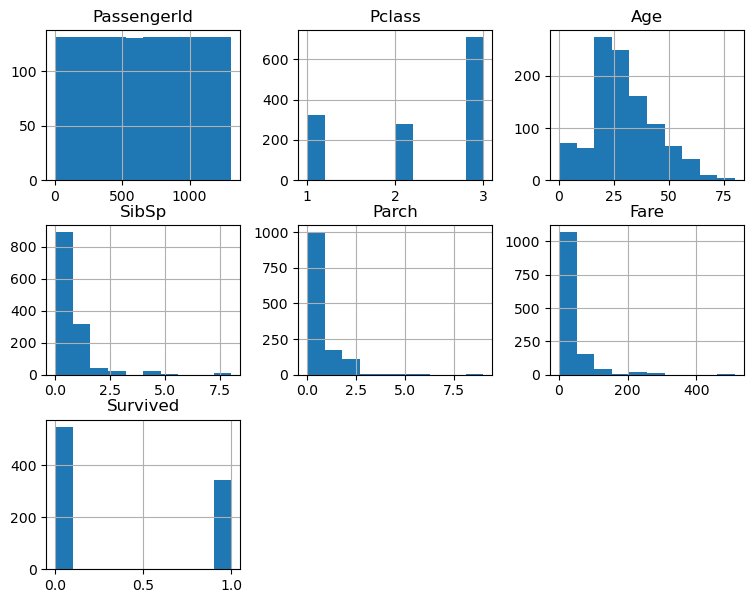

In [61]:
# visulaization techniques
df_combined.hist(figsize = (9,7)) # histogram will apply only on numeric column.


<Axes: >

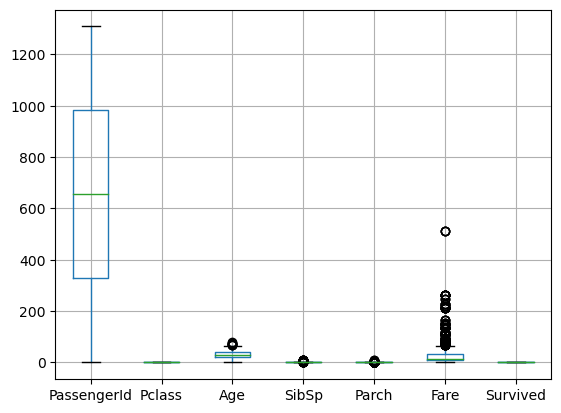

In [62]:
df_combined.boxplot()  # it can show the outlier of the each column.

In [63]:
# convert the categorical column into numerical column using encoded method.
cat_col = df_combined.select_dtypes(include = 'object').columns

In [64]:
df_combined[cat_col]

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
...,...,...,...,...,...
1304,"Montvila, Rev. Juozas",male,211536,NaN,S
1305,"Graham, Miss. Margaret Edith",female,112053,B42,S
1306,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
1307,"Behr, Mr. Karl Howell",male,111369,C148,C


In [68]:
oe = OrdinalEncoder()
df_combined[cat_col] = oe.fit_transform(df_combined[cat_col])

In [69]:
df_combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,638.0,1.0,34.5,0,0,376.0,7.8292,NaN,1.0,NaN
1,893,3,1266.0,0.0,47.0,1,0,582.0,7.0000,NaN,2.0,NaN
2,894,2,837.0,1.0,62.0,0,0,184.0,9.6875,NaN,1.0,NaN
3,895,3,1278.0,1.0,27.0,0,0,366.0,8.6625,NaN,2.0,NaN
4,896,3,543.0,0.0,22.0,1,1,338.0,12.2875,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,811.0,1.0,27.0,0,0,130.0,13.0000,NaN,2.0,0.0
1305,888,1,464.0,0.0,19.0,0,0,18.0,30.0000,40.0,2.0,1.0
1306,889,3,607.0,0.0,NaN,1,2,923.0,23.4500,NaN,2.0,0.0
1307,890,1,113.0,1.0,26.0,0,0,11.0,30.0000,77.0,0.0,1.0


In [72]:
df_combined.dtypes

PassengerId      int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
Survived       float64
dtype: object

In [73]:
df_combined.isnull() # findings the missing value

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,True,False,False,False,False,True,False,False
1307,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df_combined.isna().sum() # calculate all the missing values.

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [77]:
# Immutation  the missing value
df_combined["Age"].fillna(df_combined["Age"].mean(), inplace=True)

In [79]:
df_combined.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [80]:
df_combined["Cabin"].fillna(df_combined["Cabin"].mean(), inplace=True)

In [84]:
df_combined["Survived"].fillna(df_combined["Survived"].mode()[0], inplace=True)

In [85]:
df_combined.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       2
Survived       0
dtype: int64

In [86]:
df_combined["Embarked"].fillna(df_combined["Embarked"].mean(), inplace=True)

In [87]:
df_combined["Fare"].fillna(df_combined["Fare"].mean(), inplace=True)

In [88]:
df_combined.isna().sum() # know there is no missing values.

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [89]:
# model building using Logistic regression.
df_combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,638.0,1.0,34.500000,0,0,376.0,7.8292,96.8,1.0,0.0
1,893,3,1266.0,0.0,47.000000,1,0,582.0,7.0000,96.8,2.0,0.0
2,894,2,837.0,1.0,62.000000,0,0,184.0,9.6875,96.8,1.0,0.0
3,895,3,1278.0,1.0,27.000000,0,0,366.0,8.6625,96.8,2.0,0.0
4,896,3,543.0,0.0,22.000000,1,1,338.0,12.2875,96.8,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,811.0,1.0,27.000000,0,0,130.0,13.0000,96.8,2.0,0.0
1305,888,1,464.0,0.0,19.000000,0,0,18.0,30.0000,40.0,2.0,1.0
1306,889,3,607.0,0.0,29.881138,1,2,923.0,23.4500,96.8,2.0,0.0
1307,890,1,113.0,1.0,26.000000,0,0,11.0,30.0000,77.0,0.0,1.0


In [96]:
X = df_combined.iloc[:,:-1]
y  = df_combined['Survived']

In [97]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,638.0,1.0,34.500000,0,0,376.0,7.8292,96.8,1.0
1,893,3,1266.0,0.0,47.000000,1,0,582.0,7.0000,96.8,2.0
2,894,2,837.0,1.0,62.000000,0,0,184.0,9.6875,96.8,1.0
3,895,3,1278.0,1.0,27.000000,0,0,366.0,8.6625,96.8,2.0
4,896,3,543.0,0.0,22.000000,1,1,338.0,12.2875,96.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,811.0,1.0,27.000000,0,0,130.0,13.0000,96.8,2.0
1305,888,1,464.0,0.0,19.000000,0,0,18.0,30.0000,40.0,2.0
1306,889,3,607.0,0.0,29.881138,1,2,923.0,23.4500,96.8,2.0
1307,890,1,113.0,1.0,26.000000,0,0,11.0,30.0000,77.0,0.0


In [99]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [100]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# model building and Training
model = LogisticRegression()
model.fit(X_train,y_train) 

C:\Users\soham\New folder\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred = model.predict(X_test)

In [104]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [107]:
# finding the accuracy of evaluating

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7595419847328244
Precision: 0.6595744680851063
Recall: 0.3974358974358974
F1 Score: 0.496
ROC-AUC: 0.6552396878483835


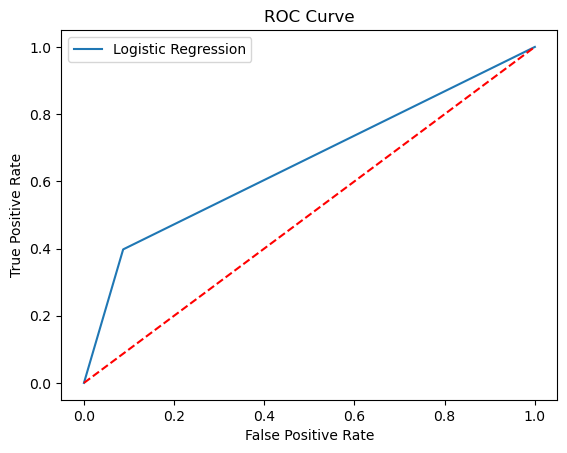

In [109]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [110]:
# 7. Interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

        Feature  Coefficient
6         Parch     0.325031
9         Cabin     0.018955
8          Fare     0.005398
2          Name     0.000471
7        Ticket    -0.000637
0   PassengerId    -0.002546
4           Age    -0.002990
10     Embarked    -0.103659
1        Pclass    -0.372618
5         SibSp    -0.440179
3           Sex    -1.571911


In [111]:
#The most significant predictors of Titanic survival are Sex, Pclass, SibSp, and Parch.

In [112]:
# Deployment with Streamlit:
# why we used streamlit = We use Streamlit mainly for building interactive web applications for data science and machine learning projects, and it’s popular because it’s fast, simple, and Python-friendly

In [113]:
def run():
    st.title("Logistic Regression Prediction App")

    # User inputs
    inputs = []
    for col in X.columns:
        val = st.number_input(f"Enter {col}", value=0.0)
        inputs.append(val)

    inputs = np.array(inputs).reshape(1, -1)
    inputs = scaler.transform(inputs)

    prediction = model.predict(inputs)
    probability = model.predict_proba(inputs)[0][1]

    st.write("Prediction:", "Positive" if prediction[0]==1 else "Negative")
    st.write("Probability of Positive:", probability)

In [114]:
# Uncomment when running Streamlit
# if __name__ == '__main__':
#     run()

In [ ]:
# interview question
# 1 What is the difference between precision and recall?
# Precision measures how many of the predicted positives are actually positive.
# Recall measures how many of the actual positives are correctly predicted.

# 2 measures how many of the actual positives are correctly predicted.
# Cross-validation (CV) is a resampling technique where the dataset is split into multiple subsets (folds). The model is trained on some folds and tested on the remaining one. This process repeats until every fold has been used for testing.
# 